---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Purchasing Power Parity and the Big Mac Index"
subtitle: ""
summary: ""
authors: [admin]
tags: [economics]
categories: [economics]
date: 2021-10-06T14:06:59+11:00
lastmod: 2021-10-06T14:06:59+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

We often see the news comparing GDP between countries. These GDPs are usually measured in constant USD or current USD. While these GDP measures are useful for comparing economic power (not the best vocab to use? Not sure what's better tho), they are not very useful to compare standard of living. That's because price level in one country is different than other countries. While Indonesian GDP is smaller than Australia if we measure it with current USD, Indonesian GDP is actually bigger if measured with GDP PPP.

Purchasing Power Parity (PPP) supposed to include difference in price level. Additionally, PPP says that long run exchange rate will move towards a rate where a piece of identical goods are the same everywhere. That is:

$$Q=\frac{P^*e}{P}\equiv 1$$

$$e=\frac{P}{P^*}$$

Where P is domestic price index, while $P^*$ is foreign price index.

That means, if GDP calculated with current dollar is different compared to GDP calculated with PPP conversion (so called international dollar), then there's a misalignment in the (short-term) exchange rate. That is, an exchange rate may be overvalued or undervalued. The Economist magazine captures this neatly and intuitively with an index called Big Mac Index.

## About Big Mac Index

[Big Mac index](https://www.economist.com/big-mac-index) is first introduced as a meme by The Economist (a magazine). Big Mac Index is based on the theory of Purchasing Power Parity (PPP). The problem with PPP is that it is almost impossible to compare 2 baskets of goods as there are difference in quality, taste, and cost (among other differences). Big Mac provide excellent comparison point because the recipe should be exactly the same everywhere. That, and obviously now $P$ and $P^*$ are no longer an index because now we only consider one good, which is the Big Mac.

Big Mac Index shows whether official exchange rate leads to an equal price of Big Mac between countries. Undervaluation of a currency (e.g., of IDN), means that a USD converted to IDN can buy less burger in Indonesia.

Go [here](https://www.economist.com/big-mac-index) and pick a country, say Indonesia. According to the economist, $P=34,000 IDR$ while $P^*=5.65 USD$. If $Q=1$ then $e$ must be

$$ e=\frac{34,000 IDR}{5.65 \\USD}=6,017.7 \frac{IDR}{USD}$$

however, official exchange rate is 14,517.50 $\frac{IDR}{USD}$ which suggests an undervaluation by 58.5%

Is this persistant across time between countries?

In [1]:
import wbdata as wb
import datetime
## Read data from the economist
url='https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-raw-index.csv'
bmi=pd.read_csv(url,parse_dates=['date'])
## Create the 'real' exchange rate measures
bmi['bmi']=bmi['dollar_ex']+bmi['dollar_ex']*bmi['USD']
bmi.iso_a3.unique() # Showing unique iso_a3 codes for the next cell

array(['ARG', 'AUS', 'BRA', 'GBR', 'CAN', 'CHL', 'CHN', 'CZE', 'DNK',
       'EUZ', 'HKG', 'HUN', 'IDN', 'ISR', 'JPN', 'MYS', 'MEX', 'NZL',
       'POL', 'RUS', 'SGP', 'ZAF', 'KOR', 'SWE', 'CHE', 'TWN', 'THA',
       'USA', 'PHL', 'NOR', 'PER', 'TUR', 'VEN', 'EGY', 'COL', 'CRI',
       'PAK', 'SAU', 'LKA', 'UKR', 'URY', 'ARE', 'IND', 'VNM', 'AZE',
       'BHR', 'HRV', 'GTM', 'HND', 'JOR', 'KWT', 'LBN', 'MDA', 'NIC',
       'OMN', 'QAT', 'ROU'], dtype=object)

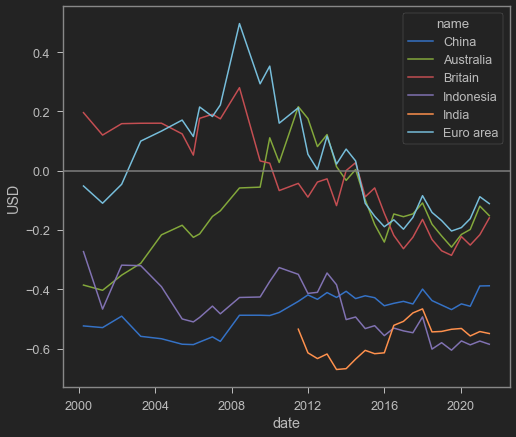

In [2]:
b=[]
ctr=('CHN','AUS','GBR','IDN','IND','EUZ')
for i in ctr:
    bmii=bmi.loc[(bmi['iso_a3'] == i)]
    b.append(bmii)
b=pd.concat(b)
sns.lineplot(data=b,x='date',y='USD',hue='name')
plt.axhline(0,color='grey')

As above graph suggests, it seems that Big Mac Index is not converge to 0. This means, the official nominal exchange rate undervaluation/overvaluation persists especially for lower income countries.

## GDP PPP

The World Bank has something like this, but a bit more official. They have the "International Comparison Program", which data can be accessed easily and intuitively from [data.worldbank.org](https://data.worldbank.org/). They consider price indices between countries, compares them, and make a "true value" of currencies. Converting economies using PPP conversion index will make comparing countries' GDP to be more accurate.

For example, Indonesian statistics body calculates Indonesian GDP using IDR. Converting it straight away with current USD will cause the GDP to be undervalued because IDR itself is undervalued. However, if we convert it with the PPP Index (aka the "international dollar"), Indonesian economy will look much bigger. Check out this graph below:

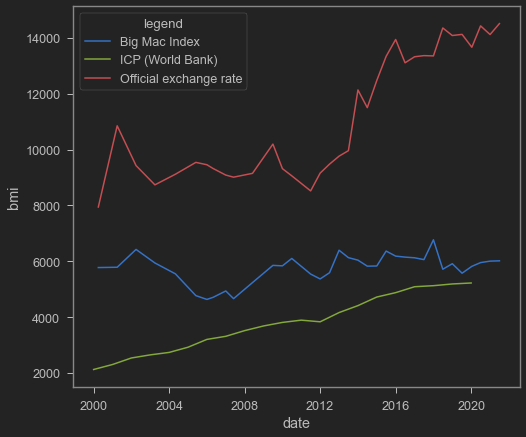

In [3]:
ctr='IDN'
bmii=bmi.loc[(bmi['iso_a3'] == ctr)]
tanggal=(datetime.datetime(2000,1,1), datetime.datetime(2021,1,1))
ICP=wb.get_dataframe({"PA.NUS.PRVT.PP" : "ICP"}, country=ctr, data_date=tanggal, convert_date=True, keep_levels=True)
ICP=ICP.reset_index()
sns.lineplot(data=bmii,x='date',y='bmi')
sns.lineplot(data=ICP,x='date',y='ICP')
sns.lineplot(data=bmii,x='date',y='dollar_ex')
plt.legend(title='legend', labels=['Big Mac Index','ICP (World Bank)','Official exchange rate'])

Graph above shows three different stuff: red line is the official IDR/USD from the Big Mac Index; blue line is the Big Mac Index converter; green line is the World Bank's version of PPP converter (the international dollar conversion) for Indonesia. As you can see, Big Mac Index is a bit more expensive than the overall PPP which may make sense (believe it or not, Big Mac in Indonesia is considered among the expensive side compared to usual foodstuffs). But both are definitely below the official IDR/USD line.

Below is the difference in GDP if we use normal USD vs International dollar:

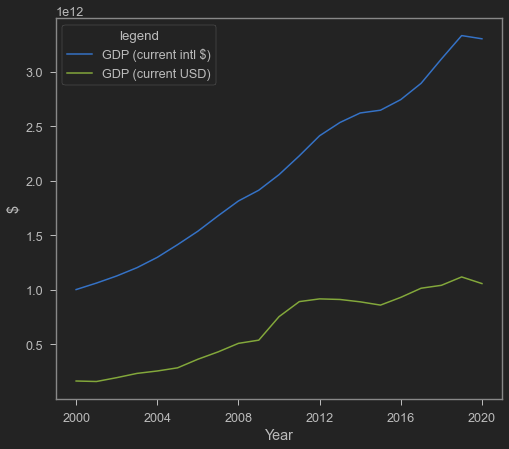

In [4]:
ctr=['IDN']
PPP=wb.get_dataframe({"NY.GDP.MKTP.PP.CD" : "PPP"}, country=ctr, data_date=tanggal, convert_date=True, keep_levels=True)
NGDP=wb.get_dataframe({"NY.GDP.MKTP.CD" : "NGDP"}, country=ctr, data_date=tanggal, convert_date=True, keep_levels=True)
PPP=PPP.reset_index()
NGDP=NGDP.reset_index()
sns.lineplot(data=PPP,x='date',y='PPP')
sns.lineplot(data=NGDP,x='date',y='NGDP')
plt.ylabel('$')
plt.xlabel('Year')
plt.legend(title='legend', labels=['GDP (current intl $)','GDP (current USD)'])

Above graph shows how differ Indonesian GDP is when calculated with GDP PPP, right? Let's see comparison with Australia. First is GDP with current USD:

<iframe src="https://data.worldbank.org/share/widget?end=2020&indicators=NY.GDP.MKTP.CD&locations=ID-AU&start=2000" width='450' height='300' frameBorder='0' scrolling="no" ></iframe>

Next is GDP PPP:

<iframe src="https://data.worldbank.org/share/widget?end=2020&indicators=NY.GDP.MKTP.PP.CD&locations=ID-AU&start=2000" width='450' height='300' frameBorder='0' scrolling="no" ></iframe>

While current USD GDP of Australia is bigger than Indonesia, Indonesian GDP PPP is bigger. That means, Indonesian standard of living is actually pretty ok compared to Australia. However, comparing current GDP sometimes better because it reflects the true buying power of a country. If you can get Australian income but consume with Indonesian prices, then you will live like a king. LoL.

Why PPP seldom holds? Well, many things can be said about it. some includes:
- cost of non-tradable is different (labour wage, property rent)
- competition (imagine if there exists a country which only Maccas is allowed to sell burger)
- Trade barrier (bad supply chain, tariff, non-tariff barriers like quota restriction)

That's it for today's post. C Ya later!